In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [82]:
filename = 'occlusion.csv'

df = pd.read_csv(filename)
df

,Name,Created,Runtime,GitHub,End Time,ID,Notes,State,Updated,Tags,...,test/steps_std/dataloader_idx_2,test/steps_std/dataloader_idx_3,test/steps_std/dataloader_idx_4,test/steps_std/dataloader_idx_5,test/steps_std/dataloader_idx_6,test/steps_std/dataloader_idx_7,test/steps_std/dataloader_idx_8,test/steps_std/dataloader_idx_9,train/steps_std,val/steps_std
0,extrapolation/random_erasing,2021-11-29T04:55:59.000Z,1660,https://github.com/ellisbrown/PonderNet_MNIST/...,2021-11-29T05:23:39.000Z,xfer8x0z,-,finished,2021-11-29T05:23:39.000Z,NaN,...,5.830204,5.708004,5.727984,5.618362,5.598667,5.50165,5.433098,5.455658,6.668766,5.870093


In [83]:
test_columns = [column for column in df.columns if ("test" in column and not np.isnan(df[column][0]))]
df[test_columns]

,test/accuracy/dataloader_idx_0,test/accuracy/dataloader_idx_1,test/accuracy/dataloader_idx_2,test/accuracy/dataloader_idx_3,test/accuracy/dataloader_idx_4,test/accuracy/dataloader_idx_5,test/accuracy/dataloader_idx_6,test/steps/dataloader_idx_0,test/steps/dataloader_idx_1,test/steps/dataloader_idx_2,...,test/steps_std/dataloader_idx_1,test/steps_std/dataloader_idx_10,test/steps_std/dataloader_idx_2,test/steps_std/dataloader_idx_3,test/steps_std/dataloader_idx_4,test/steps_std/dataloader_idx_5,test/steps_std/dataloader_idx_6,test/steps_std/dataloader_idx_7,test/steps_std/dataloader_idx_8,test/steps_std/dataloader_idx_9
0,0.989,0.9651,0.9441,0.9205,0.9005,0.8856,0.8522,8.6249,8.4814,8.3522,...,5.85094,5.354171,5.830204,5.708004,5.727984,5.618362,5.598667,5.50165,5.433098,5.455658


In [84]:
max_idx = np.max([int(column.split("_")[-1]) for column in test_columns])
fields = set([column.split("/")[1] for column in test_columns])

vals = []
for field in fields:
    for i in range(max_idx+1):
        column = f"test/{field}/dataloader_idx_{i}"
        if column in df.columns:
            vals.append(dict(field=field, idx=i, val=df[column][0]))

field_df = pd.DataFrame(vals)
field_df

,field,idx,val
0,steps_50,0,7.047200
1,steps_50,1,6.777600
2,steps_50,2,6.552000
3,steps_50,3,6.624800
4,steps_50,4,6.377600
...,...,...,...
61,steps_std,6,5.598667
62,steps_std,7,5.501650
63,steps_std,8,5.433098
64,steps_std,9,5.455658


In [85]:
fields

{'accuracy', 'steps', 'steps_25', 'steps_50', 'steps_75', 'steps_std'}

In [86]:
ps = np.linspace(0, 1, 11)
accs = field_df[field_df["field"] == "accuracy"].val
steps = field_df[field_df["field"] == "steps"].val
steps_std = field_df[field_df["field"] == "steps_std"].val

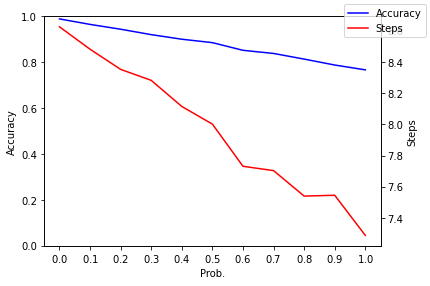

In [87]:
# plot accuracy and steps vs. rotation with two y axes
fig, ax1 = plt.subplots()
ax1.set_xlabel("Prob.")
ax1.set_ylabel("Accuracy")
ax1.plot(ps, accs, color='b', label="Accuracy")
ax1.set_xticks(ps)
ax1.set_xticklabels([f"${p:.2}$" for p in ps])
ax1.set_ylim(0., 1.0)
ax2 = ax1.twinx()
ax2.set_ylabel("Steps")
ax2.plot(ps, steps, color="r", label="Steps")
# ax2.errorbar(ps, steps, yerr=0.1, fmt='o', color="r", label="Steps")
# ax2.set_ylim(5,6)
fig.legend()

fig.tight_layout()
fig.savefig("occlusion_acc.png", dpi=500)

In [88]:
filename = 'pixelated.csv'

df = pd.read_csv(filename)
df

,Name,Created,Runtime,GitHub,End Time,ID,Notes,State,Updated,Tags,...,test/steps_std/dataloader_idx_2,test/steps_std/dataloader_idx_3,test/steps_std/dataloader_idx_4,test/steps_std/dataloader_idx_5,test/steps_std/dataloader_idx_6,test/steps_std/dataloader_idx_7,test/steps_std/dataloader_idx_8,test/steps_std/dataloader_idx_9,train/steps_std,val/steps_std
0,extrapolation/pixelated,2021-11-29T05:48:49.000Z,2651,https://github.com/ellisbrown/PonderNet_MNIST/...,2021-11-29T06:33:00.000Z,36btnt1e,-,finished,2021-11-29T06:33:00.000Z,NaN,...,5.203019,5.136204,4.977532,4.83497,4.602216,NaN,NaN,NaN,6.268281,5.53661


In [89]:
test_columns = [column for column in df.columns if ("test" in column and not np.isnan(df[column][0]))]
df[test_columns]

,test/accuracy/dataloader_idx_0,test/accuracy/dataloader_idx_1,test/accuracy/dataloader_idx_2,test/accuracy/dataloader_idx_3,test/accuracy/dataloader_idx_4,test/accuracy/dataloader_idx_5,test/accuracy/dataloader_idx_6,test/steps/dataloader_idx_0,test/steps/dataloader_idx_1,test/steps/dataloader_idx_2,...,test/steps_75/dataloader_idx_4,test/steps_75/dataloader_idx_5,test/steps_75/dataloader_idx_6,test/steps_std/dataloader_idx_0,test/steps_std/dataloader_idx_1,test/steps_std/dataloader_idx_2,test/steps_std/dataloader_idx_3,test/steps_std/dataloader_idx_4,test/steps_std/dataloader_idx_5,test/steps_std/dataloader_idx_6
0,0.9893,0.987,0.9839,0.9808,0.955,0.8172,0.2202,8.3486,7.7299,7.4811,...,9.484,8.9268,8.3536,5.580765,5.353474,5.203019,5.136204,4.977532,4.83497,4.602216


In [90]:
max_idx = np.max([int(column.split("_")[-1]) for column in test_columns])
fields = set([column.split("/")[1] for column in test_columns])

vals = []
for field in fields:
    for i in range(max_idx+1):
        column = f"test/{field}/dataloader_idx_{i}"
        if column in df.columns:
            vals.append(dict(field=field, idx=i, val=df[column][0]))

field_df = pd.DataFrame(vals)
field_df

,field,idx,val
0,steps_50,0,6.829600
1,steps_50,1,6.156000
2,steps_50,2,5.985600
3,steps_50,3,5.728000
4,steps_50,4,5.502400
5,steps_50,5,5.300800
6,steps_50,6,4.971200
7,accuracy,0,0.989300
8,accuracy,1,0.987000
9,accuracy,2,0.983900


In [91]:
ps = np.arange(28, 1, step=-4)
accs = field_df[field_df["field"] == "accuracy"].val
steps = field_df[field_df["field"] == "steps"].val
steps_std = field_df[field_df["field"] == "steps_std"].val

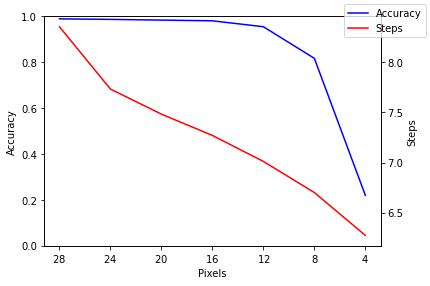

In [99]:
# plot accuracy and steps vs. rotation with two y axes
fig, ax1 = plt.subplots()
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Accuracy")
ax1.plot(ps, accs, color='b', label="Accuracy")
ax1.set_xticks(ps)
ax1.set_xticklabels([f"${p}$" for p in ps])
ax1.set_ylim(0., 1.0)
ax2 = ax1.twinx()
ax2.set_ylabel("Steps")
ax2.plot(ps, steps, color="r", label="Steps")
# ax2.errorbar(ps, steps, yerr=0.1, fmt='o', color="r", label="Steps")
# ax2.set_ylim(5,6)
fig.legend()
ax1.invert_xaxis()
fig.tight_layout()
fig.savefig("pixelated_acc.png", dpi=500)